Problem statement

To predict the possibility of order rejection.

In [2]:
import pandas as pd   # for statestical analysis
import numpy as np    # for statestical analysis
import matplotlib.pyplot as plt    # for visualizing the features
import seaborn as sns    # for visualizing the features
import statsmodels.api as sm    # for visualizing the features
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')


Importing data


Amazon sales Report

In [3]:
data = pd.read_csv('Amazon_Sale_Report.csv')
data

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [4]:
df = data.sample(n= 1000)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
107409,107409,405-4866412-6788357,06-15-22,Shipped,Amazon,Amazon.in,Expedited,NW012,NW012-TP-PJ-XL,Set,...,INR,521.0,HYDERABAD,TELANGANA,500038.0,IN,NaN,False,NaN,False
100605,100605,407-3819841-1207510,06-21-22,Cancelled,Merchant,Amazon.in,Standard,JNE3811,JNE3811-KR-XXL,kurta,...,NaN,NaN,TIRUPATI,ANDHRA PRADESH,517501.0,IN,NaN,False,Easy Ship,False
116914,116914,404-2669317-9769156,06-09-22,Shipped,Amazon,Amazon.in,Expedited,J0118,J0118-TP-XXXL,Top,...,INR,693.0,MUMBAI,MAHARASHTRA,400097.0,IN,NaN,False,NaN,False
4386,4386,402-6275660-6903558,04-27-22,Shipped,Amazon,Amazon.in,Expedited,MEN5017,MEN5017-KR-S,kurta,...,INR,549.0,HYDERABAD,TELANGANA,500058.0,IN,NaN,False,NaN,NaN
30196,30196,171-6844452-3288337,04-12-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0376,J0376-SKD-XL,Set,...,INR,999.0,BIKANER,RAJASTHAN,334003.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52027,52027,403-6142029-9741957,05-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3739,JNE3739-KR-XL,kurta,...,INR,459.0,KARIMNAGAR,TELANGANA,505472.0,IN,NaN,False,NaN,False
2225,2225,405-9376741-6381951,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-S,Set,...,INR,1112.0,PUNE,MAHARASHTRA,411014.0,IN,NaN,False,NaN,NaN
116494,116494,171-1397878-9143513,06-09-22,Shipped,Amazon,Amazon.in,Expedited,J0395,J0395-DR-XL,Western Dress,...,INR,1196.0,MAHESANA,Gujarat,384002.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
112936,112936,406-5135488-0544348,06-11-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET145,SET145-KR-NP-L,Set,...,INR,764.0,ERNAKULAM,KERALA,682020.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False


##  DATA TRANSFORMATION

Define a function as first draft of wrangle function
This is for preliminary cleansing of the dataframe and (not the final wrangle function)

Note: The conditions for wrangling the data in this function is based on the preliminary analysis of data requirements, 
which are easily and logically identifiable for cleansing, for the purpose of this project.

In [5]:
# checking dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 107409 to 39186
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1000 non-null   int64  
 1   Order ID            1000 non-null   object 
 2   Date                1000 non-null   object 
 3   Status              1000 non-null   object 
 4   Fulfilment          1000 non-null   object 
 5   Sales Channel       1000 non-null   object 
 6   ship-service-level  1000 non-null   object 
 7   Style               1000 non-null   object 
 8   SKU                 1000 non-null   object 
 9   Category            1000 non-null   object 
 10  Size                1000 non-null   object 
 11  ASIN                1000 non-null   object 
 12  Courier Status      934 non-null    object 
 13  Qty                 1000 non-null   int64  
 14  currency            935 non-null    object 
 15  Amount              935 non-null    float64
 16  

In [6]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

# Dropping all the redundant columns from df

In [7]:
df.drop(["index","Date","fulfilled-by","currency","Unnamed: 22","promotion-ids","Courier Status","ship-country"],axis=1, inplace = True)

# Preprocessing

In [8]:
df

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
107409,405-4866412-6788357,Shipped,Amazon,Amazon.in,Expedited,NW012,NW012-TP-PJ-XL,Set,XL,B0922TK8CF,1,521.0,HYDERABAD,TELANGANA,500038.0,False
100605,407-3819841-1207510,Cancelled,Merchant,Amazon.in,Standard,JNE3811,JNE3811-KR-XXL,kurta,XXL,B09RKBVHJ1,0,NaN,TIRUPATI,ANDHRA PRADESH,517501.0,False
116914,404-2669317-9769156,Shipped,Amazon,Amazon.in,Expedited,J0118,J0118-TP-XXXL,Top,3XL,B08N43MK22,1,693.0,MUMBAI,MAHARASHTRA,400097.0,False
4386,402-6275660-6903558,Shipped,Amazon,Amazon.in,Expedited,MEN5017,MEN5017-KR-S,kurta,S,B08YYZJH35,1,549.0,HYDERABAD,TELANGANA,500058.0,False
30196,171-6844452-3288337,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0376,J0376-SKD-XL,Set,XL,B09QJ51MBL,1,999.0,BIKANER,RAJASTHAN,334003.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52027,403-6142029-9741957,Shipped,Amazon,Amazon.in,Expedited,JNE3739,JNE3739-KR-XL,kurta,XL,B099FD3RH8,1,459.0,KARIMNAGAR,TELANGANA,505472.0,False
2225,405-9376741-6381951,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-S,Set,S,B08XNJ19QH,1,1112.0,PUNE,MAHARASHTRA,411014.0,False
116494,171-1397878-9143513,Shipped,Amazon,Amazon.in,Expedited,J0395,J0395-DR-XL,Western Dress,XL,B09SDXLD4C,1,1196.0,MAHESANA,Gujarat,384002.0,False
112936,406-5135488-0544348,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET145,SET145-KR-NP-L,Set,L,B0822SX9WB,1,764.0,ERNAKULAM,KERALA,682020.0,False


In [9]:
### Checking the Order ID

In [10]:
df['Order ID'].value_counts().to_dict()

{'408-1569430-1461928': 2,
 '405-4866412-6788357': 1,
 '403-0338327-1367512': 1,
 '403-9312637-5385963': 1,
 '402-7307949-6843528': 1,
 '406-1207975-4237139': 1,
 '171-7458154-9147563': 1,
 '171-3107231-2855504': 1,
 '407-4263918-6529159': 1,
 '408-2450590-0030755': 1,
 '405-4161607-8566744': 1,
 '406-8990251-5653139': 1,
 '402-8751865-2515524': 1,
 '407-0723017-0653933': 1,
 '171-2063817-4317140': 1,
 '406-0471721-0329123': 1,
 '402-5708213-7526762': 1,
 '405-3634206-9465119': 1,
 '408-9599780-8373925': 1,
 '408-6580446-0061138': 1,
 '171-7233761-6594753': 1,
 '408-4898634-2227536': 1,
 '406-3908176-3477959': 1,
 '402-5920516-0947565': 1,
 '404-2204568-6810765': 1,
 '408-1700769-4174710': 1,
 '171-0706521-2133101': 1,
 '407-9035834-9793169': 1,
 '404-0377350-2716328': 1,
 '407-7416338-4922733': 1,
 '404-4252715-3723525': 1,
 '408-2123403-8935509': 1,
 '403-3870500-2057915': 1,
 '171-6136971-5392309': 1,
 '407-3120335-1306702': 1,
 '407-0068555-8768321': 1,
 '404-9604765-6275528': 1,
 

# Deleting Duplicate Order Id's 

In [11]:
df = df[df["Order ID"].duplicated(keep = False) == False]

In [12]:
df['Order ID'].value_counts().to_dict()

{'405-4866412-6788357': 1,
 '406-0471721-0329123': 1,
 '403-9312637-5385963': 1,
 '402-7307949-6843528': 1,
 '406-1207975-4237139': 1,
 '171-7458154-9147563': 1,
 '171-3107231-2855504': 1,
 '407-4263918-6529159': 1,
 '408-2450590-0030755': 1,
 '405-4161607-8566744': 1,
 '406-8990251-5653139': 1,
 '402-8751865-2515524': 1,
 '407-0723017-0653933': 1,
 '171-2063817-4317140': 1,
 '403-0338327-1367512': 1,
 '405-3634206-9465119': 1,
 '405-9100180-2940353': 1,
 '408-9599780-8373925': 1,
 '408-6580446-0061138': 1,
 '171-7233761-6594753': 1,
 '408-4898634-2227536': 1,
 '406-3908176-3477959': 1,
 '402-5920516-0947565': 1,
 '404-2204568-6810765': 1,
 '408-1700769-4174710': 1,
 '171-0706521-2133101': 1,
 '407-9035834-9793169': 1,
 '404-0377350-2716328': 1,
 '407-7416338-4922733': 1,
 '404-9391609-5852332': 1,
 '404-4252715-3723525': 1,
 '402-5708213-7526762': 1,
 '408-2123403-8935509': 1,
 '171-6136971-5392309': 1,
 '407-3120335-1306702': 1,
 '407-0068555-8768321': 1,
 '404-9604765-6275528': 1,
 

In [13]:
df

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
107409,405-4866412-6788357,Shipped,Amazon,Amazon.in,Expedited,NW012,NW012-TP-PJ-XL,Set,XL,B0922TK8CF,1,521.0,HYDERABAD,TELANGANA,500038.0,False
100605,407-3819841-1207510,Cancelled,Merchant,Amazon.in,Standard,JNE3811,JNE3811-KR-XXL,kurta,XXL,B09RKBVHJ1,0,NaN,TIRUPATI,ANDHRA PRADESH,517501.0,False
116914,404-2669317-9769156,Shipped,Amazon,Amazon.in,Expedited,J0118,J0118-TP-XXXL,Top,3XL,B08N43MK22,1,693.0,MUMBAI,MAHARASHTRA,400097.0,False
4386,402-6275660-6903558,Shipped,Amazon,Amazon.in,Expedited,MEN5017,MEN5017-KR-S,kurta,S,B08YYZJH35,1,549.0,HYDERABAD,TELANGANA,500058.0,False
30196,171-6844452-3288337,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0376,J0376-SKD-XL,Set,XL,B09QJ51MBL,1,999.0,BIKANER,RAJASTHAN,334003.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52027,403-6142029-9741957,Shipped,Amazon,Amazon.in,Expedited,JNE3739,JNE3739-KR-XL,kurta,XL,B099FD3RH8,1,459.0,KARIMNAGAR,TELANGANA,505472.0,False
2225,405-9376741-6381951,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-S,Set,S,B08XNJ19QH,1,1112.0,PUNE,MAHARASHTRA,411014.0,False
116494,171-1397878-9143513,Shipped,Amazon,Amazon.in,Expedited,J0395,J0395-DR-XL,Western Dress,XL,B09SDXLD4C,1,1196.0,MAHESANA,Gujarat,384002.0,False
112936,406-5135488-0544348,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET145,SET145-KR-NP-L,Set,L,B0822SX9WB,1,764.0,ERNAKULAM,KERALA,682020.0,False


#### Dropping Order ID

#### Observation of Order ID

As we have deleted duplicate entries so now this order id column became redundant for model bulding 

In [14]:
#### Action on Order ID

In [15]:
df

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
107409,405-4866412-6788357,Shipped,Amazon,Amazon.in,Expedited,NW012,NW012-TP-PJ-XL,Set,XL,B0922TK8CF,1,521.0,HYDERABAD,TELANGANA,500038.0,False
100605,407-3819841-1207510,Cancelled,Merchant,Amazon.in,Standard,JNE3811,JNE3811-KR-XXL,kurta,XXL,B09RKBVHJ1,0,NaN,TIRUPATI,ANDHRA PRADESH,517501.0,False
116914,404-2669317-9769156,Shipped,Amazon,Amazon.in,Expedited,J0118,J0118-TP-XXXL,Top,3XL,B08N43MK22,1,693.0,MUMBAI,MAHARASHTRA,400097.0,False
4386,402-6275660-6903558,Shipped,Amazon,Amazon.in,Expedited,MEN5017,MEN5017-KR-S,kurta,S,B08YYZJH35,1,549.0,HYDERABAD,TELANGANA,500058.0,False
30196,171-6844452-3288337,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0376,J0376-SKD-XL,Set,XL,B09QJ51MBL,1,999.0,BIKANER,RAJASTHAN,334003.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52027,403-6142029-9741957,Shipped,Amazon,Amazon.in,Expedited,JNE3739,JNE3739-KR-XL,kurta,XL,B099FD3RH8,1,459.0,KARIMNAGAR,TELANGANA,505472.0,False
2225,405-9376741-6381951,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-S,Set,S,B08XNJ19QH,1,1112.0,PUNE,MAHARASHTRA,411014.0,False
116494,171-1397878-9143513,Shipped,Amazon,Amazon.in,Expedited,J0395,J0395-DR-XL,Western Dress,XL,B09SDXLD4C,1,1196.0,MAHESANA,Gujarat,384002.0,False
112936,406-5135488-0544348,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET145,SET145-KR-NP-L,Set,L,B0822SX9WB,1,764.0,ERNAKULAM,KERALA,682020.0,False


## Creating the Target Variable

In [16]:
df['Status'].value_counts()

Shipped                          592
Shipped - Delivered to Buyer     208
Cancelled                        171
Shipped - Returned to Seller      15
Shipped - Picked Up                9
Pending                            2
Pending - Waiting for Pick Up      1
Name: Status, dtype: int64

In [17]:
# The "status" value that can be logically assumed to be or likened to "rejection" are:
# # 'Cancelled', 'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Returning to Seller'.

# # The "status" value that can be logically assumed to be or likened to "non-rejection" are:
# # 'Shipped - Delivered to Buyer'.

# # The rest are dropped

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# drop the rows with unsure rejection status
known_value = ["Cancelled", 'Shipped - Returned to Seller','Shipped - Rejected by Buyer',
            'Shipped - Returning to Seller','Shipped - Delivered to Buyer']
df = df[df["Status"].isin(known_value)]   

# create a col "rejected" where value 1 means rejected and 0 means not-rejected" 
rejected = ["Cancelled", 'Shipped - Returned to Seller','Shipped - Rejected by Buyer',
            'Shipped - Returning to Seller']
df["rejected"] = df["Status"].isin(rejected).astype(int)    # change the dtype to "int" 

# drop col "status" 
df.drop("Status",axis = 1, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 100605 to 112936
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            394 non-null    object 
 1   Fulfilment          394 non-null    object 
 2   Sales Channel       394 non-null    object 
 3   ship-service-level  394 non-null    object 
 4   Style               394 non-null    object 
 5   SKU                 394 non-null    object 
 6   Category            394 non-null    object 
 7   Size                394 non-null    object 
 8   ASIN                394 non-null    object 
 9   Qty                 394 non-null    int64  
 10  Amount              329 non-null    float64
 11  ship-city           394 non-null    object 
 12  ship-state          394 non-null    object 
 13  ship-postal-code    394 non-null    float64
 14  B2B                 394 non-null    bool   
 15  rejected            394 non-null    int32  
dtype

## Checking new Feature and deleting the Status feature

In [21]:

df['rejected'].value_counts()

0    208
1    186
Name: rejected, dtype: int64

In [22]:
## Checking Fulfilment

In [23]:
df['Fulfilment']

100605    Merchant
30196     Merchant
27411     Merchant
80854     Merchant
114289    Merchant
            ...   
71165       Amazon
25294       Amazon
58318     Merchant
22532     Merchant
112936    Merchant
Name: Fulfilment, Length: 394, dtype: object

In [24]:
df['Fulfilment'].value_counts().to_dict()

{'Merchant': 289, 'Amazon': 105}

In [25]:
df['Fulfilment'].value_counts().to_dict()

{'Merchant': 289, 'Amazon': 105}

In [26]:
df['Fulfilment'].isnull().sum()

0

In [27]:
df['Fulfilment'].value_counts().to_dict()

{'Merchant': 289, 'Amazon': 105}

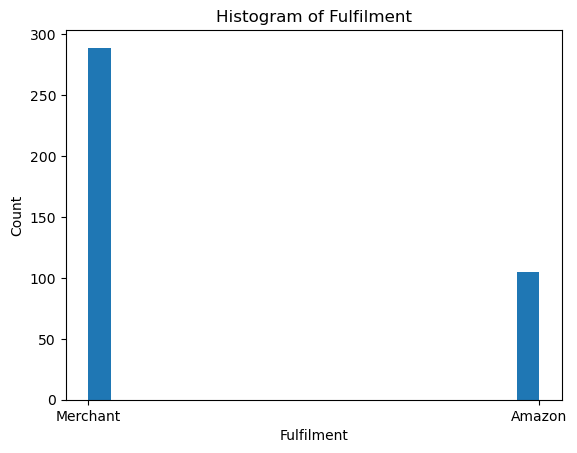

In [28]:
import matplotlib.pyplot as plt

def visualize_column(df, column_name):
    column = df[column_name]
    plt.hist(column, bins=20)
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.title("Histogram of {}".format(column_name))
    plt.show()

# Example usage:
visualize_column(df, "Fulfilment")

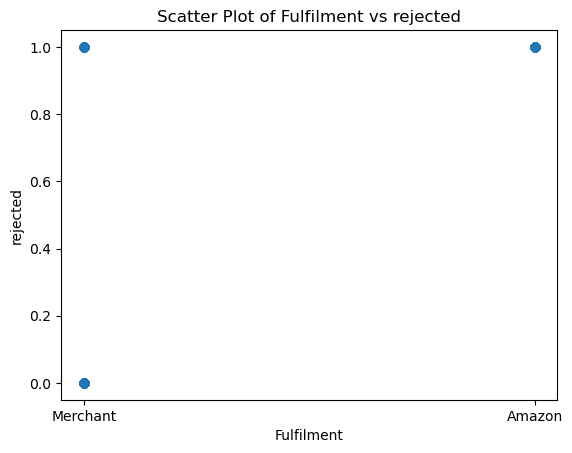

In [29]:
def scatter_plot(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]
    plt.scatter(x, y)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Scatter Plot of {} vs {}".format(x_col, y_col))
    plt.show()

# Example usage:
scatter_plot(df, "Fulfilment", "rejected")

In [30]:
def scatter_3d_interactive(df, index_col, target_col):
    fig = px.scatter_3d(df, x=df.index, y=index_col, z=target_col)
    fig.show()


In [31]:
scatter_3d_interactive(df, "Fulfilment", "rejected")

#### Observation on Fulfillment

In [32]:
#As this column is categorical we can say that it can be a good predictor for our Target

In [33]:
df.columns

Index(['Order ID', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Qty', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'B2B', 'rejected'],
      dtype='object')

In [34]:
df['Sales Channel ']

100605    Amazon.in
30196     Amazon.in
27411     Amazon.in
80854     Amazon.in
114289    Amazon.in
            ...    
71165     Amazon.in
25294     Amazon.in
58318     Amazon.in
22532     Amazon.in
112936    Amazon.in
Name: Sales Channel , Length: 394, dtype: object

## Analysing Sales Channel

In [35]:
df['Sales Channel '].value_counts()

Amazon.in    394
Name: Sales Channel , dtype: int64

In [36]:
scatter_3d_interactive(df,'Sales Channel ','rejected')

In [37]:
df = df[df['Sales Channel '] != 'Non-Amazon']

In [38]:
df['Sales Channel '].value_counts()

Amazon.in    394
Name: Sales Channel , dtype: int64

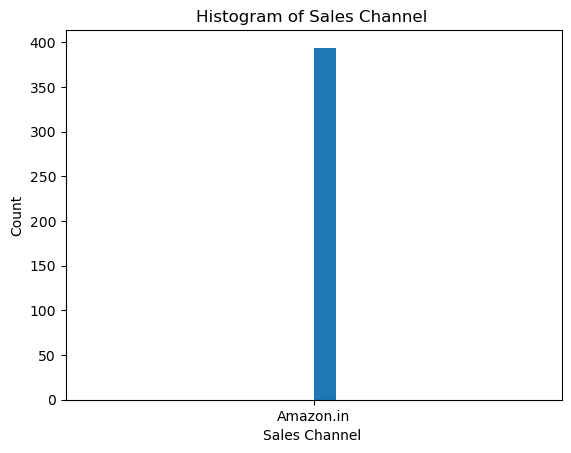

In [39]:
visualize_column(df, "Sales Channel ")

In [40]:
#As we can see in Bar plot that it contain a single value throught the rows which makes it useless predictor for model

#action >> 
#drooping it.

In [41]:
df.drop('Sales Channel ', axis =1,inplace=True)

In [42]:
df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'Style', 'SKU',
       'Category', 'Size', 'ASIN', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B', 'rejected'],
      dtype='object')

In [43]:
## Analysing ship-service-level

In [44]:
df['ship-service-level']

100605     Standard
30196      Standard
27411      Standard
80854      Standard
114289     Standard
            ...    
71165     Expedited
25294     Expedited
58318      Standard
22532      Standard
112936     Standard
Name: ship-service-level, Length: 394, dtype: object

In [45]:
df['ship-service-level'].replace

<bound method Series.replace of 100605     Standard
30196      Standard
27411      Standard
80854      Standard
114289     Standard
            ...    
71165     Expedited
25294     Expedited
58318      Standard
22532      Standard
112936     Standard
Name: ship-service-level, Length: 394, dtype: object>

In [46]:
df['ship-service-level'].value_counts()

Standard     290
Expedited    104
Name: ship-service-level, dtype: int64

In [47]:
df['ship-service-level'].isnull().sum()

0

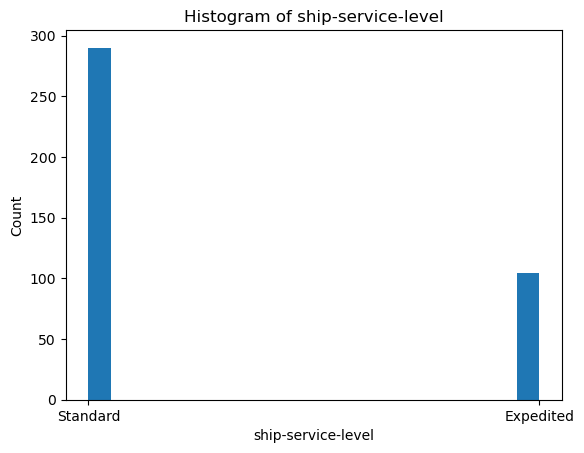

In [48]:
visualize_column(df, 'ship-service-level')

In [49]:
scatter_3d_interactive(df,'ship-service-level','rejected')

#### Observation on ship-service level

In [50]:
#categorical feature, unbalanced but can make a good predictior so no actions

In [51]:
df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'Style', 'SKU',
       'Category', 'Size', 'ASIN', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B', 'rejected'],
      dtype='object')

In [52]:
## Analysing Style

In [53]:
df['Style']

100605     JNE3811
30196        J0376
27411      JNE1408
80854        J0013
114289       J0092
            ...   
71165     PJNE3404
25294      JNE3368
58318      JNE3797
22532      JNE3479
112936      SET145
Name: Style, Length: 394, dtype: object

In [54]:
df['Style'].value_counts()

JNE3797    21
JNE3800     8
J0003       7
SET268      6
J0341       6
           ..
JNE3706     1
JNE3869     1
MEN5004     1
MEN5028     1
SET145      1
Name: Style, Length: 248, dtype: int64

In [55]:
df['Style'].isnull().sum()

0

#### Observation on Style

In [56]:
#Style feature only contain sub category of product and its heavily Cardinal so dropping it

In [57]:
df.drop('Style', axis= 1, inplace= True)

In [58]:
df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'SKU', 'Category',
       'Size', 'ASIN', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'B2B', 'rejected'],
      dtype='object')

## Analysing SKU

In [59]:
df['SKU'].value_counts()

JNE3797-KR-L              6
J0003-SET-S               4
SET183-KR-DH-M            3
J0341-DR-M                3
SET268-KR-NP-S            3
                         ..
SET378-KR-NP-XS           1
JNE3613-KR-XXXL           1
JNE1234-MULTI-KR-032-M    1
JNE3759-KR-XL             1
SET145-KR-NP-L            1
Name: SKU, Length: 346, dtype: int64

In [60]:
df['SKU'].isnull().sum()

0

In [61]:
#### Observation on SKU (Stock Keeping Unit. (String))

In [62]:
#SKU feature only contain sub category of product and its heavily Cardinal so dropping it

In [63]:
df.drop('SKU', axis=1,inplace=True)

In [64]:
df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'Category', 'Size',
       'ASIN', 'Qty', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'B2B', 'rejected'],
      dtype='object')

## Analysing Category

In [65]:
df['Category']

100605            kurta
30196               Set
27411             kurta
80854               Set
114289              Set
              ...      
71165             kurta
25294             kurta
58318     Western Dress
22532             kurta
112936              Set
Name: Category, Length: 394, dtype: object

In [66]:
df['Category'].isnull().sum()

0

In [67]:
df['Category'].value_counts()

kurta            150
Set              138
Western Dress     68
Top               26
Saree              5
Ethnic Dress       3
Blouse             3
Bottom             1
Name: Category, dtype: int64

Observation of Categories

In [68]:
#This can be considered as one of most important feature of this dataset co checked decripancies and found ok
#Labeling not possible and its semi categorical.

Analysing Size

In [69]:
df['Size'].isnull().sum()

0

In [70]:
df['Size'].value_counts()

M       78
L       71
XL      64
XXL     51
3XL     44
S       42
XS      31
Free     5
4XL      4
6XL      2
5XL      2
Name: Size, dtype: int64

In [71]:
#This can considered to be one of important feature as most of the time rejection is made because uneven/ unmatching fitting
#so keeping this feature

Analysing ASIN(Amazon Standard Identification Number)

In [72]:
df['ASIN'].isnull().sum()

0

In [73]:
df.drop('ASIN', axis=1, inplace=True)

 Observation ASIN

In [74]:
# Amazon Standard Identification Number
# 10-character alphanumeric unique identifier
# This is totally a cardinal feature and does not make any impact on target 
# so dropping this column

In [75]:

df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'Category', 'Size',
       'Qty', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B',
       'rejected'],
      dtype='object')

Analysing Qty

In [76]:

df['Qty'].value_counts()

1    276
0    116
2      2
Name: Qty, dtype: int64

In [77]:
df['Qty'].isnull().sum()

0

In [78]:
scatter_3d_interactive(df,'Qty','rejected')

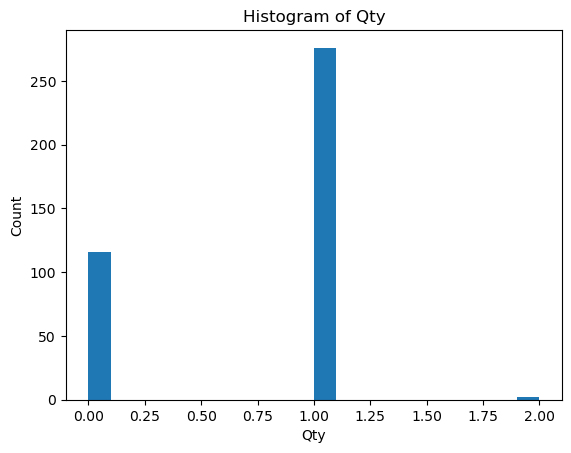

In [79]:
visualize_column(df,'Qty')

<AxesSubplot: xlabel='Qty', ylabel='Density'>

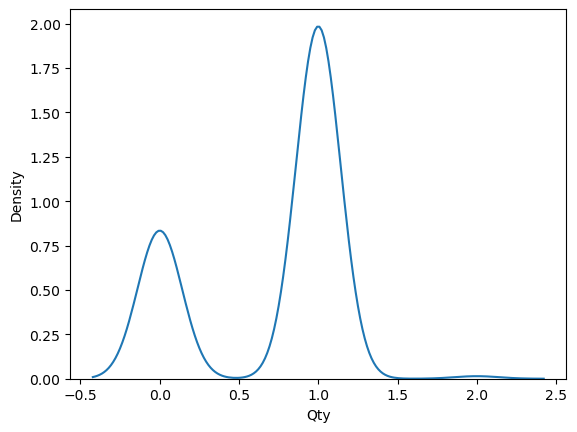

In [80]:
sns.kdeplot(df['Qty'])

In [81]:
df.drop('Qty',axis=1, inplace=True)

In [82]:
#Observation on Qty

In [83]:
# This feature it too much skewed and its cardinality makes it non categorical

# Feature "qty" is highly skewed (when assuming it as continuous variable), or
# It's highly imbalanced (when assuming it as categorical variable)
# It's logical to assume the value "0" as "NaN" (Null) because an order purchased cannot have quantity "0"
# More than 99% of datapoints have value "1" or "NaN" so it may not add much information in the analysis.

# Actions:

# Therefore, we drop feature "qty".

In [84]:
df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'Category', 'Size',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B',
       'rejected'],
      dtype='object')

Analysing Amount

In [85]:
df['Amount'].value_counts()

399.00    16
771.00    13
301.00    10
735.00     7
744.00     6
          ..
737.00     1
870.00     1
995.54     1
573.00     1
259.00     1
Name: Amount, Length: 189, dtype: int64

In [86]:
df['Amount'].isnull().sum()

65

In [87]:
# sns.boxplot(df['Amount'])

In [88]:
df[df['Amount'] == 0].shape

(1, 11)

In [89]:
# There are 769 rows have amount as 0
# It's also logical to assume the value "0" as "NaN" (Null) because an order purchased cannot have amount "0"
# so replacing 0 with NaN

In [90]:
# replace 0s with "NaN"
df["Amount"] = df["Amount"].replace(0,np.nan)
df[df['Amount'] == 0].shape

(0, 11)

In [91]:
# create an "amount" series with no outliers (removing highest 5 percentile)
no_outlier = df["Amount"][df["Amount"] < df["Amount"].quantile(0.95)]

In [92]:
# sns.boxplot(df['Amount'])

In [93]:
# remove outliers by removing highest 5 percentile of the "amount" feature
# Note: still include the rows with value "NaN" 
df = df[(df["Amount"] < df["Amount"].quantile(0.95)) | df["Amount"].isnull()].reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            377 non-null    object 
 1   Fulfilment          377 non-null    object 
 2   ship-service-level  377 non-null    object 
 3   Category            377 non-null    object 
 4   Size                377 non-null    object 
 5   Amount              311 non-null    float64
 6   ship-city           377 non-null    object 
 7   ship-state          377 non-null    object 
 8   ship-postal-code    377 non-null    float64
 9   B2B                 377 non-null    bool   
 10  rejected            377 non-null    int32  
dtypes: bool(1), float64(2), int32(1), object(7)
memory usage: 28.5+ KB


<AxesSubplot: >

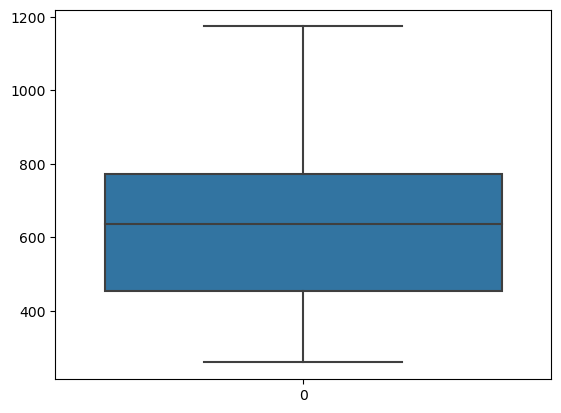

In [94]:
sns.boxplot(df['Amount'])

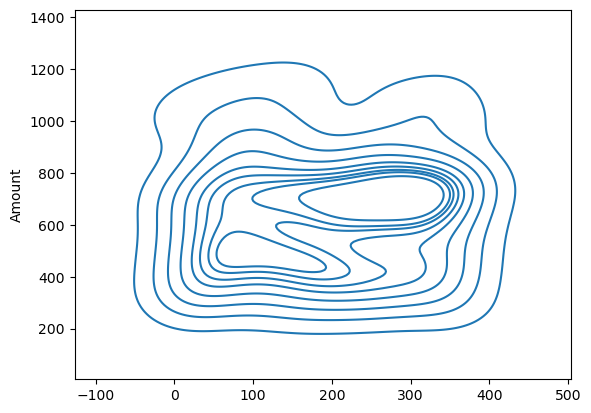

In [95]:
sns.kdeplot(x = df.index, y= df['Amount'])
plt.show()

In [96]:
scatter_3d_interactive(df,'Amount', 'rejected')

In [97]:
df['Amount'].isna().sum()

66

Observation about Amount

In [98]:
# This is a continuous data feature but cost does matters in e commerce, There were some potential outliers in the columns which 
# we have dropped and still there are some null values present in the column

# actions >>
# keeping this feature with null values in it.

In [99]:
df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'Category', 'Size',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B',
       'rejected'],
      dtype='object')

Analysing ship-city

In [100]:
df['ship-city']

0           TIRUPATI
1            BIKANER
2             Kollam
3             NASHIK
4          HYDERABAD
           ...      
372           DAHANU
373     RAXAUL BAZAR
374           MUMBAI
375    VISAKHAPATNAM
376        ERNAKULAM
Name: ship-city, Length: 377, dtype: object

In [101]:
df.drop('ship-city', axis= 1, inplace=True)

Observation of ship city

In [102]:
# totally random feature which has almost no impact on target.

# actions >> dropping it.

In [103]:
df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'Category', 'Size',
       'Amount', 'ship-state', 'ship-postal-code', 'B2B', 'rejected'],
      dtype='object')

Analysing ship-state

In [104]:
df['ship-state']

0      ANDHRA PRADESH
1           RAJASTHAN
2              KERALA
3         MAHARASHTRA
4           TELANGANA
            ...      
372       MAHARASHTRA
373             BIHAR
374       MAHARASHTRA
375    ANDHRA PRADESH
376            KERALA
Name: ship-state, Length: 377, dtype: object

In [105]:
# clean the col shipstate to attain a 37 unique values i.e.
# (28 states + 8 UT + 1 as "UNKNOWN")
df['ship-state'] = df['ship-state'].str.upper()
df['ship-state'].replace({"PONDICHERRY":"PUDUCHERRY","RAJSHTHAN":"RAJASTHAN","RAJSTHAN":"RAJASTHAN",
                            "RJ":"RAJASTHAN","PB":"PUNJAB","PUNJAB/MOHALI/ZIRAKPUR":"PUNJAB",
                            "ORISSA":"ODISHA","DELHI":"NEW DELHI","NL":"UNKNOWN","APO":"UNKNOWN",
                            "AR":"UNKNOWN"}, inplace = True)

In [106]:
#Creating New column and labeling the data

In [107]:
# Add a col named "regions" based on the geographical location of states
df["region"] = df["ship-state"].replace({
    "MAHARASHTRA":"westindia","KARNATAKA":"southindia",
    'PUDUCHERRY':"southindia",'TELANGANA':"southindia",
    'ANDHRA PRADESH':"southindia", 'HARYANA':"northindia",
    'JHARKHAND':"eastindia", 'CHHATTISGARH':"eastindia",
    'ASSAM':"northeastindia",'ODISHA':"eastindia",
    'UTTAR PRADESH':"northindia", 'GUJARAT':"westindia",
    'TAMIL NADU':"southindia", 'UTTARAKHAND':"northindia",
    'WEST BENGAL':"eastindia", 'RAJASTHAN':"westindia",
    'NEW DELHI':"centralindia",'MADHYA PRADESH':"centralindia",
    'KERALA':"southindia", 'JAMMU & KASHMIR':"northindia",
    'BIHAR':"eastindia",'MEGHALAYA':"northeastindia",
    'PUNJAB':"northindia", 'GOA':"southindia",
    'TRIPURA':"northeastindia", 'CHANDIGARH':"northindia",
    'HIMACHAL PRADESH':"northindia",'SIKKIM':"northeastindia",
    "ANDAMAN & NICOBAR ":"eastindia", 'MANIPUR':"northeastindia",
    'MIZORAM':"northeastindia",'NAGALAND':"northeastindia",
    'ARUNACHAL PRADESH':"northeastindia", 'LADAKH':"northindia",
    'DADRA AND NAGAR':"westindia",'LAKSHADWEEP':"southindia"
})

# rows with "UNKNOWN" shipstates
df = df[df["ship-state"] != "UNKNOWN"]

In [108]:
df.drop('ship-state', axis=1, inplace=True)

Observation of ship-state

In [109]:
# there is too much cardinality in data so converted into more understanding way and created new feature out of it.

# action >> keeping region column then dropping ship-state

In [110]:
df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'Category', 'Size',
       'Amount', 'ship-postal-code', 'B2B', 'rejected', 'region'],
      dtype='object')

Analysing ship-postal-code

In [111]:
df['ship-postal-code'].value_counts()

500072.0    4
410210.0    4
560032.0    3
400092.0    3
560066.0    3
           ..
533101.0    1
586212.0    1
756001.0    1
500019.0    1
682020.0    1
Name: ship-postal-code, Length: 334, dtype: int64

In [112]:
df.drop('ship-postal-code', axis=1, inplace=True)

In [113]:
#Observation of ship-postal-code

In [114]:
# This is unique identification code for area of package delivery which does not that important for target column.

# action >> dropping it.

In [115]:
df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'Category', 'Size',
       'Amount', 'B2B', 'rejected', 'region'],
      dtype='object')

Analyaing B2B (Bussiness to Bussiness)

In [116]:
df['B2B'].value_counts()

False    376
True       1
Name: B2B, dtype: int64

In [117]:
import numpy as np

In [118]:
df['B2B']

0      False
1      False
2      False
3      False
4      False
       ...  
372    False
373    False
374    False
375    False
376    False
Name: B2B, Length: 377, dtype: bool

In [119]:
df['B2B'] = df['B2B'].astype(object)

Observation on B2B (Bussiness to Bussiness)

In [120]:
# A categorical feature but imballanced 

# actions >> keeping it.

In [121]:
df.columns

Index(['Order ID', 'Fulfilment', 'ship-service-level', 'Category', 'Size',
       'Amount', 'B2B', 'rejected', 'region'],
      dtype='object')

In [122]:
df.select_dtypes(include = "object").nunique()

Order ID              377
Fulfilment              2
ship-service-level      2
Category                8
Size                   11
B2B                     2
region                  6
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            377 non-null    object 
 1   Fulfilment          377 non-null    object 
 2   ship-service-level  377 non-null    object 
 3   Category            377 non-null    object 
 4   Size                377 non-null    object 
 5   Amount              311 non-null    float64
 6   B2B                 377 non-null    object 
 7   rejected            377 non-null    int32  
 8   region              377 non-null    object 
dtypes: float64(1), int32(1), object(7)
memory usage: 28.0+ KB


In [124]:
# As seen above,
# There r some null values in region(newly created feature

Analysing region 

In [125]:
df['region'].value_counts()

southindia        161
westindia          93
northindia         43
eastindia          40
centralindia       32
northeastindia      8
Name: region, dtype: int64

In [126]:
df['region'].tail(59)

318      southindia
319       eastindia
320      southindia
321      southindia
322      southindia
323      southindia
324      northindia
325       eastindia
326      northindia
327       westindia
328      southindia
329       westindia
330    centralindia
331       westindia
332    centralindia
333      southindia
334       westindia
335       eastindia
336      southindia
337       westindia
338      southindia
339      southindia
340       westindia
341    centralindia
342      southindia
343       westindia
344       westindia
345       westindia
346       westindia
347      southindia
348      southindia
349       westindia
350       westindia
351      southindia
352      southindia
353       westindia
354      southindia
355       eastindia
356       westindia
357      southindia
358    centralindia
359       westindia
360    centralindia
361      southindia
362      southindia
363       eastindia
364      southindia
365    centralindia
366    centralindia
367      southindia


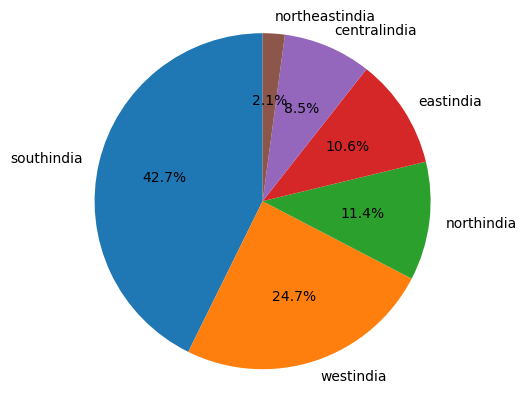

In [127]:
def draw_pie_chart(df, feature):
    feature_counts = df[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    plt.show()

draw_pie_chart(df, 'region')

In [128]:
df.shape

(377, 9)

In [129]:
df.dropna(subset=['region'],inplace=True)

In [130]:
df.shape

(377, 9)

In [131]:
df['region'].isnull().sum()

0

Checking the correlation

In [132]:
df.corr()

,Amount,rejected
Amount,1.000000,-0.117698
rejected,-0.117698,1.000000


In [133]:
df.head()

,Order ID,Fulfilment,ship-service-level,Category,Size,Amount,B2B,rejected,region
0,407-3819841-1207510,Merchant,Standard,kurta,XXL,NaN,False,1,southindia
1,171-6844452-3288337,Merchant,Standard,Set,XL,999.0,False,0,westindia
2,171-4075723-8148313,Merchant,Standard,kurta,3XL,358.1,False,1,southindia
3,406-9054467-7883536,Merchant,Standard,Set,XS,1008.0,False,0,westindia
4,403-2730381-1024358,Merchant,Standard,Set,L,1008.0,False,0,southindia


In [134]:
df.drop('Order ID',axis=1, inplace=True)

In [135]:
df

,Fulfilment,ship-service-level,Category,Size,Amount,B2B,rejected,region
0,Merchant,Standard,kurta,XXL,NaN,False,1,southindia
1,Merchant,Standard,Set,XL,999.0,False,0,westindia
2,Merchant,Standard,kurta,3XL,358.1,False,1,southindia
3,Merchant,Standard,Set,XS,1008.0,False,0,westindia
4,Merchant,Standard,Set,L,1008.0,False,0,southindia
...,...,...,...,...,...,...,...,...
372,Amazon,Expedited,kurta,4XL,NaN,False,1,westindia
373,Amazon,Expedited,kurta,L,471.0,False,1,eastindia
374,Merchant,Standard,Western Dress,3XL,771.0,False,0,westindia
375,Merchant,Standard,kurta,M,259.0,False,0,southindia


## Feature Engineering

In [136]:
df['Fulfilment'].value_counts().to_dict()

{'Merchant': 275, 'Amazon': 102}

In [137]:
df['Fulfilment'].replace({'Merchant': 0, 'Amazon': 1}, inplace=True)
df['Fulfilment'] = df['Fulfilment'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fulfilment          377 non-null    int32  
 1   ship-service-level  377 non-null    object 
 2   Category            377 non-null    object 
 3   Size                377 non-null    object 
 4   Amount              311 non-null    float64
 5   B2B                 377 non-null    object 
 6   rejected            377 non-null    int32  
 7   region              377 non-null    object 
dtypes: float64(1), int32(2), object(5)
memory usage: 23.6+ KB


In [138]:

df['ship-service-level'].value_counts().to_dict()

{'Standard': 276, 'Expedited': 101}

In [139]:
df.replace({'Standard': 0, 'Expedited': 1}, inplace=True)
df['ship-service-level'] = df['ship-service-level'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fulfilment          377 non-null    int32  
 1   ship-service-level  377 non-null    int32  
 2   Category            377 non-null    object 
 3   Size                377 non-null    object 
 4   Amount              311 non-null    float64
 5   B2B                 377 non-null    bool   
 6   rejected            377 non-null    int32  
 7   region              377 non-null    object 
dtypes: bool(1), float64(1), int32(3), object(3)
memory usage: 19.5+ KB


In [140]:
df['Category'].value_counts().to_dict()

{'kurta': 149,
 'Set': 122,
 'Western Dress': 68,
 'Top': 26,
 'Saree': 5,
 'Ethnic Dress': 3,
 'Blouse': 3,
 'Bottom': 1}

In [141]:
df.replace({'kurta': 0,
 'Set': 1,
 'Western Dress': 2,
 'Top': 3,
 'Ethnic Dress': 4,
 'Blouse': 5,
 'Bottom': 6,
 'Saree': 7}, inplace=True)
df['Category'] = df['Category'].astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fulfilment          377 non-null    int32  
 1   ship-service-level  377 non-null    int32  
 2   Category            377 non-null    int32  
 3   Size                377 non-null    object 
 4   Amount              311 non-null    float64
 5   B2B                 377 non-null    bool   
 6   rejected            377 non-null    int32  
 7   region              377 non-null    object 
dtypes: bool(1), float64(1), int32(4), object(2)
memory usage: 18.0+ KB


In [142]:
df['Size'].value_counts().to_dict()

{'M': 74,
 'L': 67,
 'XL': 60,
 'XXL': 49,
 '3XL': 43,
 'S': 41,
 'XS': 30,
 'Free': 5,
 '4XL': 4,
 '6XL': 2,
 '5XL': 2}

In [143]:
df['Size'].replace({'M': 0,
 'L': 1,
 'XL': 2,
 'XXL': 3,
 'S': 4,
 '3XL': 5,
 'XS': 6,
 '6XL': 7,
 '5XL': 8,
 '4XL': 9,
 'Free': 10}, inplace=True)

df['Size'] = df['Size'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fulfilment          377 non-null    int32  
 1   ship-service-level  377 non-null    int32  
 2   Category            377 non-null    int32  
 3   Size                377 non-null    int32  
 4   Amount              311 non-null    float64
 5   B2B                 377 non-null    bool   
 6   rejected            377 non-null    int32  
 7   region              377 non-null    object 
dtypes: bool(1), float64(1), int32(5), object(1)
memory usage: 16.6+ KB


In [144]:
df['B2B'].value_counts().to_dict()

{False: 376, True: 1}

In [145]:
df['B2B'].replace({False: 0, True: 1},inplace=True)
df['B2B'] = df['B2B'].astype('int')
df.head()

,Fulfilment,ship-service-level,Category,Size,Amount,B2B,rejected,region
0,0,0,0,3,NaN,0,1,southindia
1,0,0,1,2,999.0,0,0,westindia
2,0,0,0,5,358.1,0,1,southindia
3,0,0,1,6,1008.0,0,0,westindia
4,0,0,1,1,1008.0,0,0,southindia


In [146]:
df['region'].value_counts().to_dict()

{'southindia': 161,
 'westindia': 93,
 'northindia': 43,
 'eastindia': 40,
 'centralindia': 32,
 'northeastindia': 8}

In [147]:
df['region'].replace({'southindia': 0,
 'westindia': 1,
 'northindia': 2,
 'eastindia': 3,
 'centralindia': 4,
 'northeastindia': 5}, inplace=True)
df['region'] = df['region'].astype('int')

In [148]:
df

,Fulfilment,ship-service-level,Category,Size,Amount,B2B,rejected,region
0,0,0,0,3,NaN,0,1,0
1,0,0,1,2,999.0,0,0,1
2,0,0,0,5,358.1,0,1,0
3,0,0,1,6,1008.0,0,0,1
4,0,0,1,1,1008.0,0,0,0
...,...,...,...,...,...,...,...,...
372,1,1,0,9,NaN,0,1,1
373,1,1,0,1,471.0,0,1,3
374,0,0,2,5,771.0,0,0,1
375,0,0,0,0,259.0,0,0,0


In [149]:
df.isnull().sum()

Fulfilment             0
ship-service-level     0
Category               0
Size                   0
Amount                66
B2B                    0
rejected               0
region                 0
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fulfilment          377 non-null    int32  
 1   ship-service-level  377 non-null    int32  
 2   Category            377 non-null    int32  
 3   Size                377 non-null    int32  
 4   Amount              311 non-null    float64
 5   B2B                 377 non-null    int32  
 6   rejected            377 non-null    int32  
 7   region              377 non-null    int32  
dtypes: float64(1), int32(7)
memory usage: 16.2 KB


In [151]:
df.sort_index(axis=1, inplace=True)

In [152]:
df

,Amount,B2B,Category,Fulfilment,Size,region,rejected,ship-service-level
0,NaN,0,0,0,3,0,1,0
1,999.0,0,1,0,2,1,0,0
2,358.1,0,0,0,5,0,1,0
3,1008.0,0,1,0,6,1,0,0
4,1008.0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
372,NaN,0,0,1,9,1,1,1
373,471.0,0,0,1,1,3,1,1
374,771.0,0,2,0,5,1,0,0
375,259.0,0,0,0,0,0,0,0


Separating the dependant and independant variables

In [153]:
df['rejected'].value_counts()

0    194
1    183
Name: rejected, dtype: int64

<AxesSubplot: xlabel='rejected', ylabel='count'>

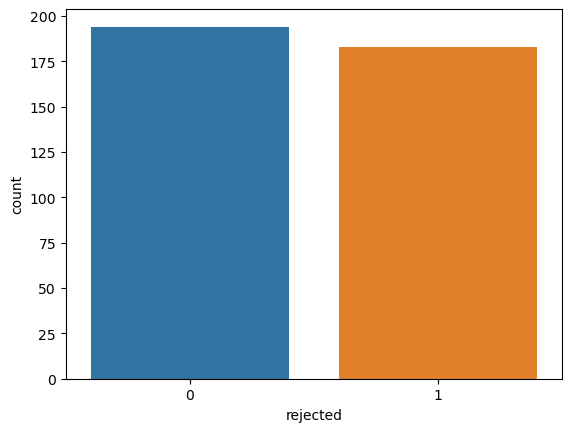

In [154]:

sns.countplot(x=df['rejected'])

In [155]:
df.replace({'ship-service-level':'shipservicelevel'},inplace=True)

In [156]:
df.drop('ship-service-level',axis=1,inplace=True)
df

,Amount,B2B,Category,Fulfilment,Size,region,rejected
0,NaN,0,0,0,3,0,1
1,999.0,0,1,0,2,1,0
2,358.1,0,0,0,5,0,1
3,1008.0,0,1,0,6,1,0
4,1008.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...
372,NaN,0,0,1,9,1,1
373,471.0,0,0,1,1,3,1
374,771.0,0,2,0,5,1,0
375,259.0,0,0,0,0,0,0


In [157]:
## Filling up the null values of each feature with most frequent entries from that feature using simple imputer

# create the SimpleImputer and OneHotEncoder objects
imputer = SimpleImputer(strategy="most_frequent")
# encoder = OneHotEncoder(drop="first")

# fit and transform the imputer and encoder on the data
imputed_data = imputer.fit_transform(df)
# encoded_data = encoder.fit_transform(imputed_data)

# convert the encoded data to a pandas DataFrame
df1 = pd.DataFrame(imputed_data, columns=df.columns)

In [158]:
df1 = df.drop('rejected',axis=1)
df1

,Amount,B2B,Category,Fulfilment,Size,region
0,NaN,0,0,0,3,0
1,999.0,0,1,0,2,1
2,358.1,0,0,0,5,0
3,1008.0,0,1,0,6,1
4,1008.0,0,1,0,1,0
...,...,...,...,...,...,...
372,NaN,0,0,1,9,1
373,471.0,0,0,1,1,3
374,771.0,0,2,0,5,1
375,259.0,0,0,0,0,0


In [159]:
df1.isnull().sum()

Amount        66
B2B            0
Category       0
Fulfilment     0
Size           0
region         0
dtype: int64

Scaling the data

In [160]:
norm_model = MinMaxScaler()
arr = norm_model.fit_transform(df1)
x_scaled_df= pd.DataFrame(arr, columns=df1.columns)
x_scaled_df.head()

,Amount,B2B,Category,Fulfilment,Size,region
0,NaN,0.0,0.000000,0.0,0.3,0.0
1,0.808743,0.0,0.142857,0.0,0.2,0.2
2,0.108306,0.0,0.000000,0.0,0.5,0.0
3,0.818579,0.0,0.142857,0.0,0.6,0.2
4,0.818579,0.0,0.142857,0.0,0.1,0.0


In [161]:
std_model = StandardScaler()
arr = std_model.fit_transform(df1)
x_std_df = pd.DataFrame(arr,columns=df1.columns)
x_std_df.head()

,Amount,B2B,Category,Fulfilment,Size,region
0,NaN,-0.051571,-0.850106,-0.609023,0.143827,-0.873302
1,1.651558,-0.051571,-0.056814,-0.609023,-0.300622,-0.168302
2,-1.261911,-0.051571,-0.850106,-0.609023,1.032726,-0.873302
3,1.692471,-0.051571,-0.056814,-0.609023,1.477175,-0.168302
4,1.692471,-0.051571,-0.056814,-0.609023,-0.745072,-0.873302


In [162]:

from scipy import stats

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
from sklearn.preprocessing import scale

In [165]:
# x = scale(x)
# # x_scaledy = np.array(y).reshape(-1,1)
# # x_scaled = sc_y.fit_transform(x_scaled)

Model training


In [178]:
x = df.drop('rejected',axis=1)
y = df['rejected']

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [180]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(301, 6)
(76, 6)
(301,)
(76,)


In [181]:
x

,Amount,B2B,Category,Fulfilment,Size,region
0,635.693119,0,0,0,3,0
1,999.000000,0,1,0,2,1
2,358.100000,0,0,0,5,0
3,1008.000000,0,1,0,6,1
4,1008.000000,0,1,0,1,0
...,...,...,...,...,...,...
372,635.693119,0,0,1,9,1
373,471.000000,0,0,1,1,3
374,771.000000,0,2,0,5,1
375,259.000000,0,0,0,0,0


In [182]:
x.isnull().sum()

Amount        0
B2B           0
Category      0
Fulfilment    0
Size          0
region        0
dtype: int64

In [183]:
df['Amount'].mean()

635.6931189710618

In [184]:
df['Amount'].fillna(df['Amount'].mean(),inplace=True)

In [185]:
df.isnull().sum()

Amount        0
B2B           0
Category      0
Fulfilment    0
Size          0
region        0
rejected      0
dtype: int64

In [186]:
x_train

,Amount,B2B,Category,Fulfilment,Size,region
210,568.000000,0,0,0,0,1
34,635.693119,0,1,1,4,1
252,735.000000,0,2,0,2,0
57,399.000000,0,0,1,1,0
172,635.693119,0,0,1,0,0
...,...,...,...,...,...,...
369,759.000000,0,1,0,0,0
320,449.000000,0,1,0,2,0
15,376.000000,0,0,1,3,3
125,721.000000,0,2,0,0,2


In [187]:
y_train

210    0
34     1
252    0
57     1
172    1
      ..
369    0
320    0
15     1
125    0
265    1
Name: rejected, Length: 301, dtype: int32

In [188]:
from imblearn.over_sampling import SMOTE

In [189]:
smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [190]:
x.shape,y.shape

((388, 6), (388,))

In [191]:
x_train

,Amount,B2B,Category,Fulfilment,Size,region
278,376.000000,0,0,1,0,0
345,1173.000000,0,1,0,2,1
236,599.000000,0,3,0,0,0
232,771.000000,0,2,0,1,3
306,771.000000,0,2,0,6,0
...,...,...,...,...,...,...
203,744.000000,0,2,0,0,0
255,319.050000,0,0,0,1,4
72,888.000000,0,1,1,0,1
235,635.693119,0,0,0,2,0


In [192]:
df1.shape

(377, 6)

Building the Logistic regression model

In [193]:
# Building the Logistic regression model
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [194]:
# Evaluation for testing Data
y_pred = lr_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is:\n', cnf_matrix)
print('*'*90)

acc = accuracy_score(y_test, y_pred)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_test, y_pred)
print('\nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[39  1]
 [12 26]]
******************************************************************************************
Accuracy Score is:  0.8333333333333334
******************************************************************************************

Classification Report is :
               precision    recall  f1-score   support

           0       0.76      0.97      0.86        40
           1       0.96      0.68      0.80        38

    accuracy                           0.83        78
   macro avg       0.86      0.83      0.83        78
weighted avg       0.86      0.83      0.83        78



In [195]:
# Evaluation for training Data
y_pred_train = lr_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix is:\n', cnf_matrix)
print('*'*90)

acc = accuracy_score(y_train, y_pred_train)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_train, y_pred_train)
print('\nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[151   3]
 [ 70  86]]
******************************************************************************************
Accuracy Score is:  0.7645161290322581
******************************************************************************************

Classification Report is :
               precision    recall  f1-score   support

           0       0.68      0.98      0.81       154
           1       0.97      0.55      0.70       156

    accuracy                           0.76       310
   macro avg       0.82      0.77      0.75       310
weighted avg       0.83      0.76      0.75       310



### Checking which feature is performing major role for target prediction

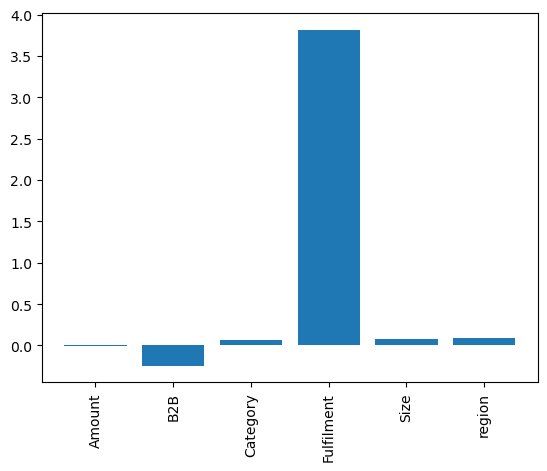

In [196]:
# get the feature importances from the model
importances = lr_model.coef_[0]

# create a bar plot of the feature importances
plt.bar(x_train.columns, importances)
plt.xticks(rotation=90)
plt.show()

Observation of logistic regression model

In [197]:
# ## About Model:
#     Model accuracy is good but the false positives and false negatives prediction is exceptionally high 
#     which increases possibility of making incorrect prediction.

# ## About finding best feature predictor
#     As per above graph we can say that Fulfilment and ship-service-level are great predictors

 Random forest Algo

In [198]:
rf_model = RandomForestClassifier(random_state=40)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=40)

Evaluating random forest

In [199]:
#Evaluation for testing Data
y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is:\n', cnf_matrix)

print('*'*90)
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_test, y_pred)
print('nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[36  4]
 [ 9 29]]
******************************************************************************************
Accuracy Score is:  0.8333333333333334
******************************************************************************************
nClassification Report is :
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        40
           1       0.88      0.76      0.82        38

    accuracy                           0.83        78
   macro avg       0.84      0.83      0.83        78
weighted avg       0.84      0.83      0.83        78



In [200]:
#Evaluation for testing Data
y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix is:\n', cnf_matrix)
print('*'*90)

acc = accuracy_score(y_train, y_pred_train)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_train, y_pred_train)
print('nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[150   4]
 [  0 156]]
******************************************************************************************
Accuracy Score is:  0.9870967741935484
******************************************************************************************
nClassification Report is :
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       154
           1       0.97      1.00      0.99       156

    accuracy                           0.99       310
   macro avg       0.99      0.99      0.99       310
weighted avg       0.99      0.99      0.99       310



In [201]:
rf_model.feature_importances_

array([3.83966085e-01, 3.05691641e-04, 7.02128544e-02, 3.14812209e-01,
       1.35824125e-01, 9.48790349e-02])

Hypertuning with gridsearch cv

In [202]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 20],
    'min_samples_split': [2,10],
    'min_samples_leaf': [1,4]
}

# Create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

# Fit the GridSearchCV object to the dataset
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
             param_grid={'max_depth': [5, 20], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200]})

In [203]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score:  0.8


In [204]:
# Evaluation for testing Data
y_pred = grid_search.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is:\n', cnf_matrix)

print('*'*90)
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_test, y_pred)
print('\nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[37  3]
 [11 27]]
******************************************************************************************
Accuracy Score is:  0.8205128205128205
******************************************************************************************

Classification Report is :
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        40
           1       0.90      0.71      0.79        38

    accuracy                           0.82        78
   macro avg       0.84      0.82      0.82        78
weighted avg       0.83      0.82      0.82        78



In [205]:
# Evaluation for training Data
y_pred_train = grid_search.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix is:\n', cnf_matrix)

print('*'*90)
acc = accuracy_score(y_train, y_pred_train)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_train, y_pred_train)
print('\nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[149   5]
 [ 35 121]]
******************************************************************************************
Accuracy Score is:  0.8709677419354839
******************************************************************************************

Classification Report is :
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       154
           1       0.96      0.78      0.86       156

    accuracy                           0.87       310
   macro avg       0.89      0.87      0.87       310
weighted avg       0.89      0.87      0.87       310



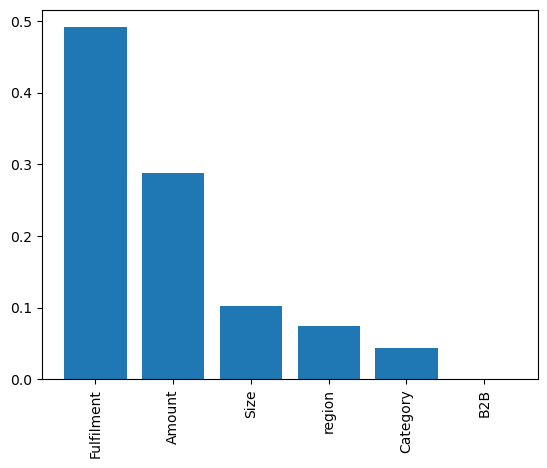

In [206]:
# get the best estimator from the GridSearchCV object
best_estimator = grid_search.best_estimator_

# get the feature importances from the best estimator and create a dataframe
importances = pd.DataFrame({'Feature': x.columns, 'Importance': best_estimator.feature_importances_})

# sort the importances in descending order
importances = importances.sort_values('Importance', ascending=False)

# create a bar plot of the feature importances
plt.bar(importances['Feature'], importances['Importance'])
plt.xticks(rotation=90)
plt.show()

Observation over hyper tuned random forest algo

In [207]:
# ## About Model
#     Bit differece in training and testing data accuracy and false positive and false negative rate is bit high 
#     which again leads to incorrect prediction

# ## About finding best feature predictor
#     As per above graph we can say that Amount, Fulfilment and ship-service-level are great predictors

Building alternate model using svc

In [208]:
# create an SVC object
svc = SVC()

# define the parameter grid for GridSearchCV
param_grid = {'C': [1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto'] + list(range(1, 10))
             }

In [209]:
# create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')


In [210]:
# # fit the GridSearchCV object to the data
# grid_search.fit(x_train, y_train)

In [211]:
# get the best estimator from the GridSearchCV object
# best_estimator = grid_search.best_estimator_

In [212]:
# print the best parameters
# print('Best parameters:', grid_search.best_params_)

# # print the best score
# print('Best score:', grid_search.best_score_)  

### Naive_bayes

In [213]:
from sklearn.naive_bayes import MultinomialNB

In [214]:
mnb_model = MultinomialNB()
mnb_model.fit(x_train,y_train)

MultinomialNB()

In [215]:
#Evaluation for testing Data
y_pred = mnb_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is:\n', cnf_matrix)

print('*'*90)
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_test, y_pred)
print('nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[33  7]
 [10 28]]
******************************************************************************************
Accuracy Score is:  0.782051282051282
******************************************************************************************
nClassification Report is :
               precision    recall  f1-score   support

           0       0.77      0.82      0.80        40
           1       0.80      0.74      0.77        38

    accuracy                           0.78        78
   macro avg       0.78      0.78      0.78        78
weighted avg       0.78      0.78      0.78        78



In [216]:
#Evaluation for training Data
y_pred_train = mnb_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix is:\n', cnf_matrix)

print('*'*90)
acc = accuracy_score(y_train, y_pred_train)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_train, y_pred_train)
print('nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[140  14]
 [ 60  96]]
******************************************************************************************
Accuracy Score is:  0.7612903225806451
******************************************************************************************
nClassification Report is :
               precision    recall  f1-score   support

           0       0.70      0.91      0.79       154
           1       0.87      0.62      0.72       156

    accuracy                           0.76       310
   macro avg       0.79      0.76      0.76       310
weighted avg       0.79      0.76      0.76       310



## Normality of residual

In [217]:
Residual = y_train - y_pred_train
Residual

278    0
345    0
236    0
232    1
306    0
      ..
203    0
255    0
72     0
235    1
37     0
Name: rejected, Length: 310, dtype: int32

## 1) kdeplot

<AxesSubplot: xlabel='rejected', ylabel='Density'>

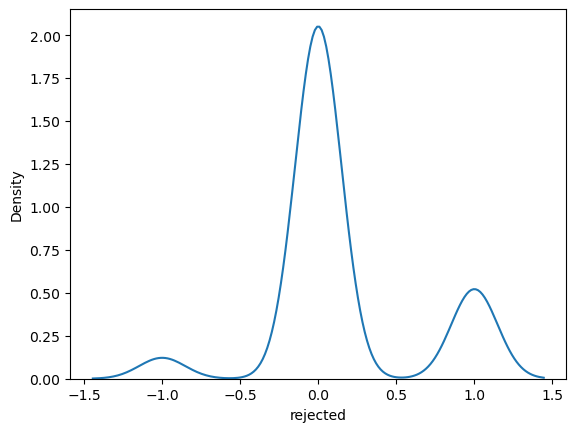

In [218]:
sns.kdeplot(Residual)

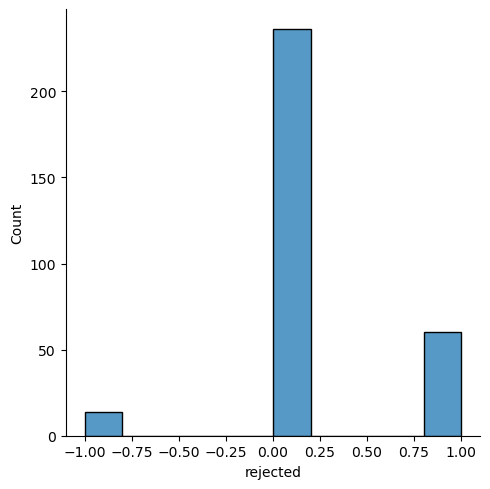

In [219]:
sns.displot(Residual)

## hypothesis testing

## 1.shapirotest

In [220]:
from scipy.stats import shapiro

In [221]:
_,p_val = shapiro(Residual)
print('Residual value is:',p_val)

if p_val >=0.5:
    print('Data is normally distributed')
    print('Null hypothesis is true')
    
else:
    print('Data is not normally distributed')
    print('Null hypothesis is false')

Residual value is: 2.4121128088839976e-25
Data is not normally distributed
Null hypothesis is false


## 2.Kstest

In [222]:
from scipy.stats import kstest

In [223]:
_,p_val = kstest(Residual,'norm')
print('Residual value is:',p_val)

if p_val >=0.5:
    print('Data is normally distributed')
    print('Null hypothesis is true')
    
else:
    print('Data is not normally distributed')
    print('Null hypothesis is false')

Residual value is: 4.062094661392711e-59
Data is not normally distributed
Null hypothesis is false


## 3.Normaltest

In [224]:
from scipy.stats import normaltest

In [225]:
_,p_val = normaltest(Residual)
print('Residual value is:',p_val)

if p_val >=0.5:
    print('Data is normally distributed')
    print('Null hypothesis is true')
    
else:
    print('Data is not normally distributed')
    print('Null hypothesis is false')

Residual value is: 0.00015166404254694137
Data is not normally distributed
Null hypothesis is false


## QQplot

In [226]:
import statsmodels.api as sm 

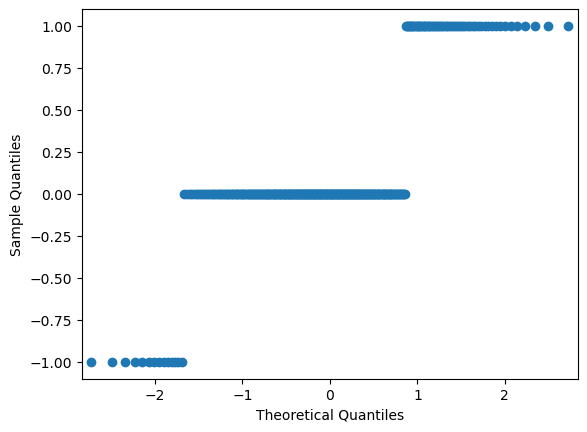

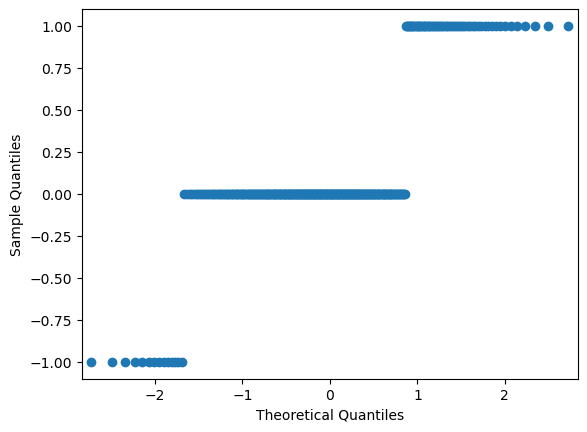

In [227]:
sm.qqplot(Residual)

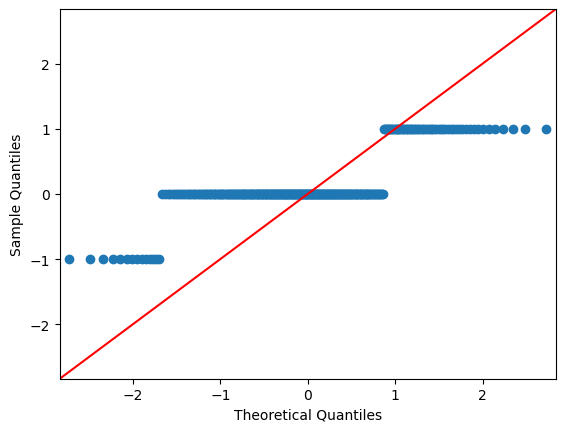

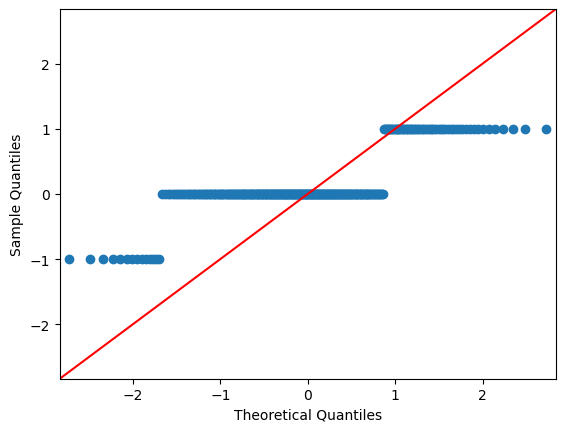

In [228]:
sm.qqplot(Residual, line='45')

<AxesSubplot: xlabel='rejected'>

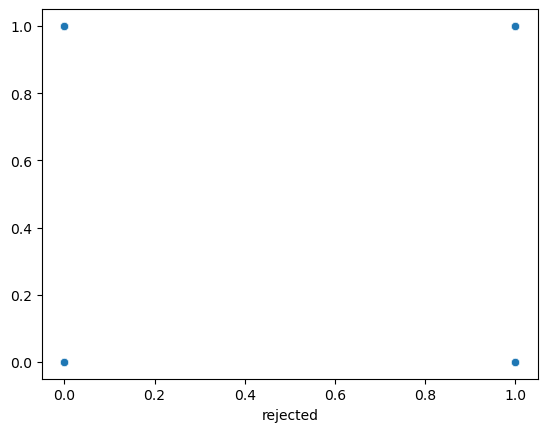

In [229]:
sns.scatterplot(x=y_test, y=y_pred)

## Testing of model on user inputs

In [230]:
x_test.head()

,Amount,B2B,Category,Fulfilment,Size,region
93,449.00,0,0,0,5,2
179,376.00,0,0,1,0,0
127,922.86,0,1,0,2,4
62,771.00,0,2,0,1,1
227,322.86,0,3,0,3,4


In [231]:
y

0      1
1      0
2      1
3      0
4      0
      ..
383    1
384    1
385    1
386    1
387    1
Name: rejected, Length: 388, dtype: int32

In [232]:
y.value_counts()

1    194
0    194
Name: rejected, dtype: int64

In [233]:
x.columns

Index(['Amount', 'B2B', 'Category', 'Fulfilment', 'Size', 'region'], dtype='object')

## saving/dumping a file2


In [234]:
import pickle

with open('rf_model.pkl','wb') as f:
    pickle.dump(rf_model,f)

In [235]:
Amount = 640.966907
B2B = 0
Category = 1 
Fulfilment = 1
Size = 1
region = 2

test_array = ([[Amount,B2B,Category,Fulfilment,Size,region]])

def predicted_rejection(test_array):
    rejection = rf_model.predict(test_array)
    rejection = np.around(rejection, 2)
    
    return rejection
    
rejection = predicted_rejection(test_array)
print(f'Predicted rejection of customer was:{rejection}')


if rejection == [1]:
    print('Product was rejected by customer due to high pricing')
else:
    print('Product was rejected by customer due to negative reviews')

Predicted rejection of customer was:[1]
Product was rejected by customer due to high pricing


In [236]:
Amount = 859.000000
B2B = 0
Category = 2
Fulfilment = 0
Size = 3
region = 0

test_array = ([[Amount,B2B,Category,Fulfilment,Size,region]])

def predicted_rejection(test_array):
    rejection = rf_model.predict(test_array)
    rejection = np.around(rejection, 2)
    
    return rejection
    
rejection = predicted_rejection(test_array)
print(f'Predicted rejection of customer was:{rejection}')


if rejection == [1]:
    print('Product was rejected by customer due to high pricing')
else:
    print('Product was rejected by customer due to negative reviews')

Predicted rejection of customer was:[0]
Product was rejected by customer due to negative reviews
